<a href="https://colab.research.google.com/github/atchutannavivekkumar/codsoft-dataanalytics/blob/main/codsoft.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt


# Load the dataset
titanic_data = pd.read_csv('/content/Titanic-Dataset.csv')

print(titanic_data.isnull().sum())


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [45]:
# Drop unnecessary columns
titanic_data_cleaned = titanic_data.drop(columns=["PassengerId", "Name", "Ticket", "Cabin"])

# Handle missing values
imputer_age = SimpleImputer(strategy="median")
titanic_data_cleaned["Age"] = imputer_age.fit_transform(titanic_data_cleaned[["Age"]])

 # Encode categorical variables
label_encoder_sex = LabelEncoder()
titanic_data_cleaned["Sex"] = label_encoder_sex.fit_transform(titanic_data_cleaned["Sex"])

label_encoder_embarked = LabelEncoder()
titanic_data_cleaned["Embarked"] = label_encoder_embarked.fit_transform(titanic_data_cleaned["Embarked"])


# Separate features and target variable
X = titanic_data_cleaned.drop(columns=["Survived"])
y = titanic_data_cleaned["Survived"]

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train logistic regression model
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(titanic_data_cleaned.head())



   Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0         0       3    1  22.0      1      0   7.2500         2
1         1       1    0  38.0      1      0  71.2833         0
2         1       3    0  26.0      0      0   7.9250         2
3         1       1    0  35.0      1      0  53.1000         2
4         0       3    1  35.0      0      0   8.0500         2


In [16]:

print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_rep)
print("\nConfusion Matrix:\n", conf_matrix)

Accuracy: 0.8100558659217877

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179


Confusion Matrix:
 [[90 15]
 [19 55]]


In [27]:
# Group data by 'Sex' and 'Survived' to calculate the counts
survival_by_sex = titanic_data.groupby(['Sex', 'Survived']).size().unstack()

# Rename columns for better readability
survival_by_sex.columns = ['Did not survive', 'Survived']

# Calculate the difference in the number of survivors
survival_by_sex['Difference'] = survival_by_sex['Survived'] - survival_by_sex['Did not survive']

print(survival_by_sex)


        Did not survive  Survived  Difference
Sex                                          
female               81       233         152
male                468       109        -359


<ipython-input-41-1af79cd792ce>:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='People survived', fontsize=12)


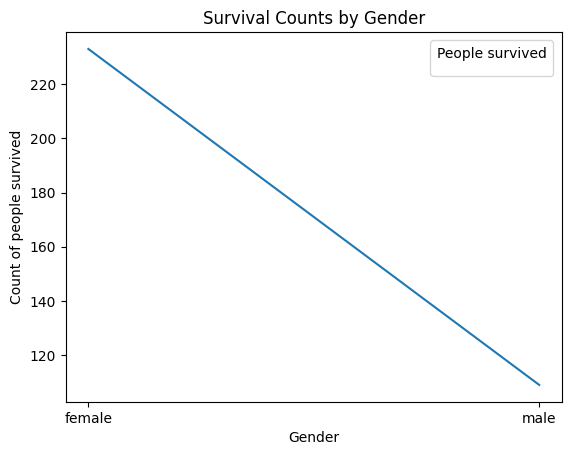

In [41]:
plt.plot(survival_by_sex['Survived'])
plt.title('Survival Counts by Gender')
plt.xlabel('Gender')
plt.ylabel('Count of people survived')
plt.legend(title='People survived', fontsize=12)
plt.show()

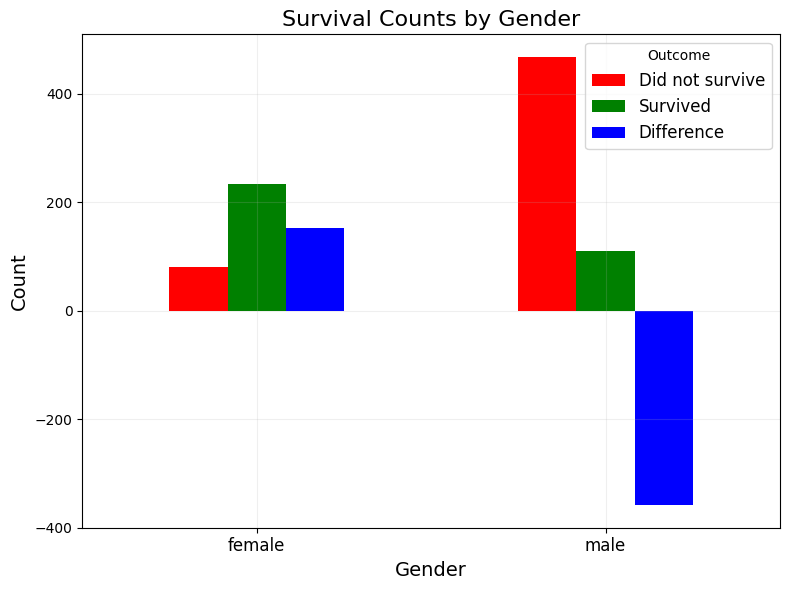

In [39]:
survival_by_sex.plot(kind='bar', figsize=(8, 6), color=['red', 'green','blue'])

# Add labels and title
plt.title('Survival Counts by Gender', fontsize=16)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.legend(title='Outcome', fontsize=12)
plt.grid(axis='y', linestyle='-', alpha=0.2)
plt.grid(axis='x', linestyle='-', alpha=0.2)
# Show the plot
plt.tight_layout()
plt.show()